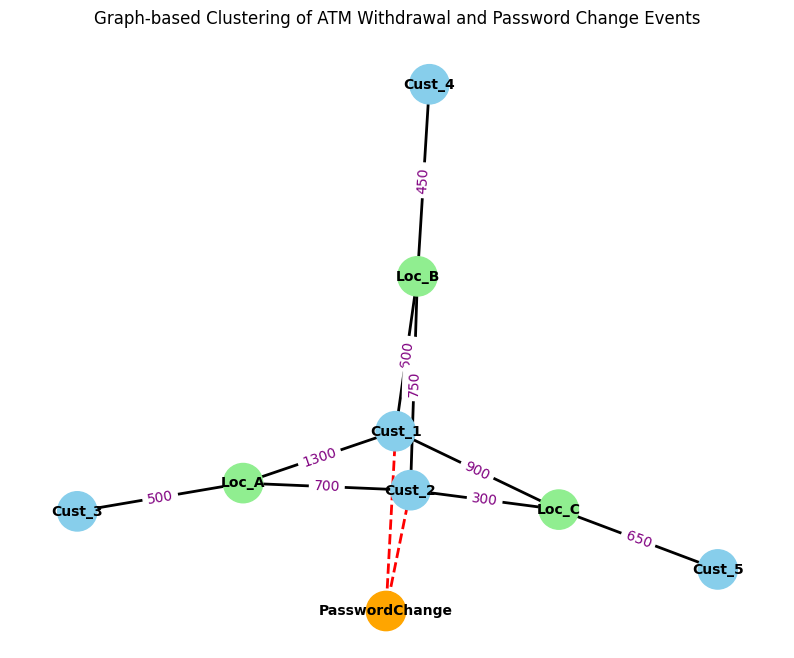

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Define synthetic data
customers = ['Cust_1', 'Cust_2', 'Cust_3', 'Cust_4', 'Cust_5']
locations = ['Loc_A', 'Loc_B', 'Loc_C']

# Initialize graph
G = nx.Graph()

# Add customer nodes
for cust in customers:
    G.add_node(cust, node_type='customer')

# Add location nodes
for loc in locations:
    G.add_node(loc, node_type='location')

# Add password change node
G.add_node('PasswordChange', node_type='event')

# Define edges (withdrawals)
withdrawals = [
    ('Cust_1', 'Loc_A', 1500), ('Cust_1', 'Loc_A', 700), ('Cust_1', 'Loc_B', 400),
    ('Cust_1', 'Loc_C', 900), ('Cust_1', 'Loc_A', 1300), ('Cust_1', 'Loc_B', 600),
    ('Cust_2', 'Loc_B', 1200), ('Cust_2', 'Loc_A', 700), ('Cust_2', 'Loc_C', 900),
    ('Cust_2', 'Loc_C', 800), ('Cust_2', 'Loc_B', 750), ('Cust_2', 'Loc_C', 300),
    ('Cust_3', 'Loc_A', 500), ('Cust_4', 'Loc_B', 450), ('Cust_5', 'Loc_C', 650)
]

# Add edges for withdrawals
for cust, loc, amt in withdrawals:
    G.add_edge(cust, loc, amount=amt, edge_type='withdrawal')

# Add password change events for two customers
password_changes = [('Cust_1', 'PasswordChange'), ('Cust_2', 'PasswordChange')]

for cust, event in password_changes:
    G.add_edge(cust, event, edge_type='password_change')

# Visualize graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, seed=42)

# Node coloring
node_colors = []
for node in G.nodes(data=True):
    if node[1]['node_type'] == 'customer':
        node_colors.append('skyblue')
    elif node[1]['node_type'] == 'location':
        node_colors.append('lightgreen')
    else:
        node_colors.append('orange')

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800)

# Draw edges
withdrawal_edges = [(u, v) for u, v, d in G.edges(data=True) if d['edge_type'] == 'withdrawal']
password_edges = [(u, v) for u, v, d in G.edges(data=True) if d['edge_type'] == 'password_change']

nx.draw_networkx_edges(G, pos, edgelist=withdrawal_edges, width=2)
nx.draw_networkx_edges(G, pos, edgelist=password_edges, width=2, edge_color='red', style='dashed')

# Labels
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Edge labels for withdrawal amounts
edge_labels = {(u, v): d['amount'] for u, v, d in G.edges(data=True) if 'amount' in d}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='purple')

plt.title('Graph-based Clustering of ATM Withdrawal and Password Change Events')
plt.axis('off')
plt.show()